## Insight project: part 2 
### Data splitting

In [8]:
#shuffle the original data
#do a 80:20 cut for traing and testing
#write training and test data into separated csv files
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data = pd.read_csv('data/fingerprinters.csv')
print(data.shape)
#print(data.head())


(834, 4098)


In [9]:
data = data.sample(frac=1, random_state=1)
print(data.shape)
#print(data.head())


(834, 4098)


In [10]:
rows = len(data)
train = data[:int(rows * 0.85)]
test = data[int(rows * 0.85):]
print(train.shape, test.shape)
print('train data total hits: {}'.format(sum(train.hits)), 
      'train data percentage of hits: {}'.format(sum(train.hits) / len(train)))
print('test data total hits: {}'.format(sum(test.hits)), 
      'test data percentage of hits: {}'.format(sum(test.hits) / len(test)))

(708, 4098) (126, 4098)
train data total hits: 174 train data percentage of hits: 0.2457627118644068
test data total hits: 29 test data percentage of hits: 0.23015873015873015


In [11]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

In [12]:
test.iloc[:5, 1]

140    1
416    0
660    0
476    0
152    1
Name: hits, dtype: int64

explained variance: 0.057135662694580217
(174, 2)
(534, 2)
(29, 2)
(97, 2)


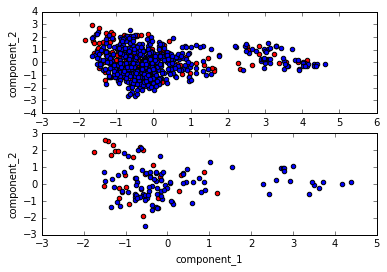

In [13]:
#visulize train and test data after pca application
#n_components equal 2
pca = PCA(n_components=2)
pca.fit(train.iloc[:, 2:].values)
print('explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

train_data_array = pca.transform(train.iloc[:, 2:].values)
pos_train = train_data_array[train['hits'] > 0]
neg_train = train_data_array[train['hits'] == 0]
print(pos_train.shape)
print(neg_train.shape)

test_data_array = pca.transform(test.iloc[:, 2:].values)
pos_test = test_data_array[test['hits'] > 0]
neg_test = test_data_array[test['hits'] == 0]
print(pos_test.shape)
print(neg_test.shape)

plt.subplot(211)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_train[:, 0], pos_train[:, 1], c='r')
plt.scatter(neg_train[:, 0], neg_train[:, 1], c='b')

plt.subplot(212)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_test[:, 0], pos_test[:, 1], c='r')
plt.scatter(neg_test[:, 0], neg_test[:, 1], c='b')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 708 samples in 0.008s...
[t-SNE] Computed neighbors for 708 samples in 0.336s...
[t-SNE] Computed conditional probabilities for sample 708 / 708
[t-SNE] Mean sigma: 1.630052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.526428
[t-SNE] Error after 300 iterations: 1.774055
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 126 samples in 0.001s...
[t-SNE] Computed neighbors for 126 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 126 / 126
[t-SNE] Mean sigma: 1.427349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.155235
[t-SNE] Error after 300 iterations: 2.391180


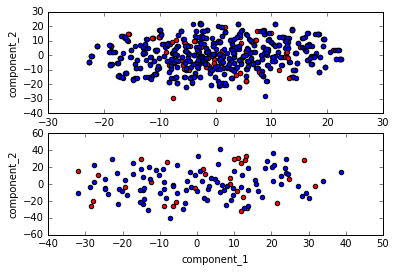

In [14]:
#apply tsne on train and test data
pca = PCA(n_components=200)
pca.fit(train.iloc[:, 2:].values)
pca_train_array = pca.transform(train.iloc[:, 2:].values)
pca_test_array = pca.transform(test.iloc[:, 2:].values)
tsne = TSNE(n_components=2, perplexity=5, verbose=1, n_iter=300)

train_data_array = tsne.fit_transform(pca_train_array)
pos_train = train_data_array[train['hits'] > 0]
neg_train = train_data_array[train['hits'] == 0]

test_data_array = tsne.fit_transform(pca_test_array)
pos_test = test_data_array[test['hits'] > 0]
neg_test = test_data_array[test['hits'] == 0]

plt.subplot(211)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_train[:, 0], pos_train[:, 1], c='r')
plt.scatter(neg_train[:, 0], neg_train[:, 1], c='b')

plt.subplot(212)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_test[:, 0], pos_test[:, 1], c='r')
plt.scatter(neg_test[:, 0], neg_test[:, 1], c='b')